In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
import copy
import torch.nn as nn
import torch.nn.functional as F
import os

from dataload import *
from autoencoder import *

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

## Parameters

In [3]:
batch_size_train = 4
batch_size_test = 4

#train_loader, test_loader = define_mnist_loaders(batch_size_train, batch_size_test)
train_loader, test_loader = define_landscapes_loaders(batch_size_train, batch_size_test, 
                                                      rgb=True, rescale=256, crop=224)

encoding_dim = 2048
lr = 0.001
log_interval = 10
n_epochs = 3

Loaded image shape in tensor: torch.Size([4, 3, 224, 224])


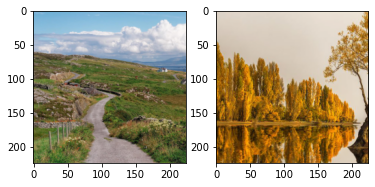

In [4]:
# get minibatch
x = next(iter(train_loader))
x_test = next(iter(test_loader))
if isinstance(x, list): # if MNIST
    x = x[0]; x_test = x_test[0]
print('Loaded image shape in tensor:', x.size())
fig,axes = plt.subplots(1,2);
img1 = x[0].numpy().transpose((1, 2, 0))
img2 = x_test[0].detach().numpy().transpose((1, 2, 0))
axes[0].imshow(img1); # .transpose((1, 2, 0))
axes[1].imshow(img2);

## Test trained model

In [5]:
#autoencoder = MNIST_Autoencoder(28*28, encoding_dim)
autoencoder = C_Autoencoder_224(224*224, encoding_dim)
opt = torch.optim.Adam(autoencoder.parameters(), lr=lr, weight_decay=1e-5)

<All keys matched successfully>

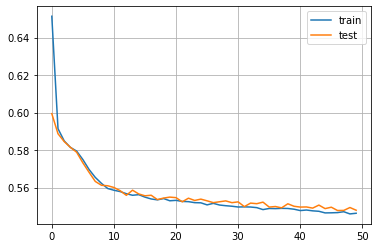

In [6]:
import pandas as pd
fichier = "model_c-autoenc224_adam_n50"
model = C_Autoencoder_224(224*224, 2048).to(device)
losses = pd.read_csv(f"saved_models/{fichier}.csv")
plt.plot(losses.index, losses["train"], label = "train")
plt.plot(losses.index, losses["val"], label = "test")
plt.legend()
plt.grid()
model.load_state_dict(torch.load(f"saved_models/{fichier}.sav"))

Shape : torch.Size([4, 3, 224, 224])


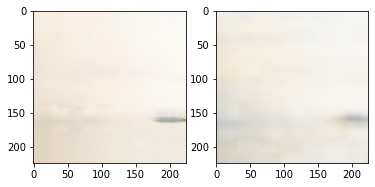

In [12]:
x = next(iter(test_loader))
i = np.random.randint(batch_size_test)
fig,axes = plt.subplots(1,2)
x = x.to(device)
reconstructed = model(x)
print(f"Shape : {reconstructed.shape}")
axes[0].imshow(x[i].cpu().numpy().transpose((1, 2, 0))); 
axes[1].imshow(reconstructed[i].cpu().detach().numpy().transpose((1, 2, 0))); 